# Applying Neural Networks to recognize handwritten digits
Mình bắt đầu với bài toán đơn giản về nhận diện chữ số viết tay từ 0 đến 9. Dataset được sử dụng là MNIST.

## Load data from the MNIST dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, softmax
import numpy as np
import matplotlib.pyplot as plt

Sau khi import các module cần thiết, chúng ta load data và thử visualize một số hình ảnh trong dataset. Dưới đây, mình visualize 10 ảnh đầu tiên.

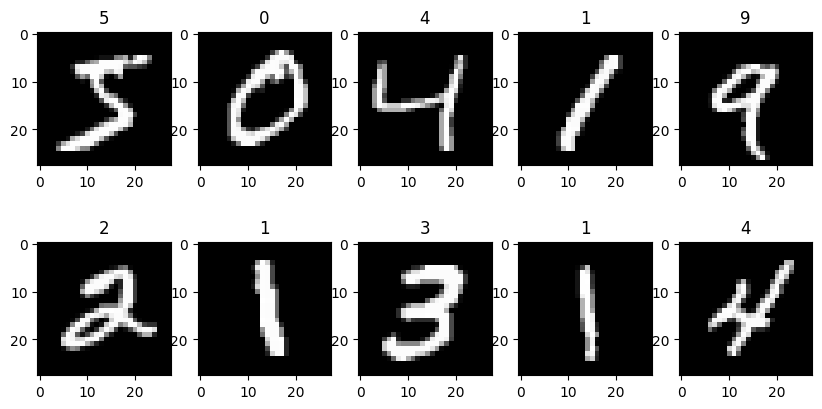

In [8]:
# Load data and visualize the first 10 images and their labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(train_images[i], cmap = "gray")
    axs[i].set_title(train_labels[i])
plt.show()
    

Xem kích thước các ảnh và giá trị pixels lớn nhất/nhỏ nhất. Chúng ta có thể thấy mỗi ảnh trong dataset đều có kích thước 28 x 28 pixels, với giá trị pixel (intensity) lớn nhất là 255 và nhỏ nhất là 0.

In [9]:
# Show the size of images
img1 = train_images[0]
shape_img1 = img1.shape
print(f"Size of images (in pixels): {shape_img1}")

# Show the minimum and maximum grayscale value of pixels
print(f"Maximum value of pixels: {np.max(img1)}")
print(f"Minimum value of pixels: {np.min(img1)}")

Size of images (in pixels): (28, 28)
Maximum value of pixels: 255
Minimum value of pixels: 0


## Data pre-processing

Để huấn luyện mô hình, chúng ta hoàn toàn có thể không normalize giá trị pixels về miền từ 0 đến 1 nhưng như vậy việc tính toán sẽ tốn nhiều thời gian hơn. Do đó, mình chuẩn hóa giá trị pixels về [0,1] để việc học của model hiệu quả hơn.

In [11]:
# Normalize to [0,1] 
train_images = train_images / 255
test_images = test_images / 255

## Construct the neural network

In [26]:
model = Sequential(
    [
        Flatten(input_shape = (28, 28)),
        Dense(128, activation = "relu", name = "L1"),
        Dense(64, activation = "relu", name = "L2"),
        Dense(10, activation = "linear", name = "L3")
    ]
)

model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True), 
    optimizer = Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

history = model.fit(train_images, train_labels, epochs = 50)

c:\Users\5425\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8739 - loss: 0.4267
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9661 - loss: 0.1081
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9782 - loss: 0.0697
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9846 - loss: 0.0496
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9867 - loss: 0.0414
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9902 - loss: 0.0315
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9924 - loss: 0.0235
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9927 - loss: 0.0212
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9942 - loss: 0.0181
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9944 - loss: 0.0170
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9953 - loss: 0.0136
Epoch 12/50
1875/1875 ━━━━━━━━

Trong neural network trên, mình sử dụng 1 lớp **Flatten()**:   
> Flatten(input_shape = (28, 28)) <br>      
   
Vì mỗi ảnh có kích thước 28 x 28 pixels, chúng ta sẽ trải phẳng (flatten) mỗi ảnh thành 1 vector 784 dòng để đưa vào các lớp sau.
    
Sau đó, mình khởi tạo 2 lớp **Dense()** có lần lượt 128 và 64 neurons. Việc chọn số lượng neuron cho mỗi lớp, tại đây, là ngẫu nhiên thôi. Trên thực tế, chúng ta sẽ cố gắng lấy số lượng neuron của các lớp về sau giảm dần.  
Activation function của 2 lớp này là **ReLU**.   
> Dense(128, activation = "relu", name = "L1"),         
> Dense(64, activation = "relu", name = "L2"),
   
Lớp **Dense()** cuối cùng có 10 neurons ứng với 10 labels (chữ số từ 0 đến 9) và activation function là **linear**. Việc sử dụng activation là hàm tuyến tính (coi như không có activation) tại đây sẽ gây khó hiểu một chút. Chúng ta có thể hiểu rằng việc dùng hàm **linear** sau đó set loss function là **SparseCategoricalCrossEntropy(from_logits=True)** hoạt động giống như dùng hàm **softmax**. Ưu điểm của cách này là model có thể tránh làm tròn số và cho kết quả chính xác hơn.   

Bên cạnh đó, mình sử dụng thuật toán tối ưu (optimizer) **Adam**. Thuật toán này tự động điều chỉnh giá trị các learning rate trong quá trình huấn luyện để tối ưu thời gian học của model.
   

Biểu diễn độ chính xác và mất mát trên training set trên biểu đồ

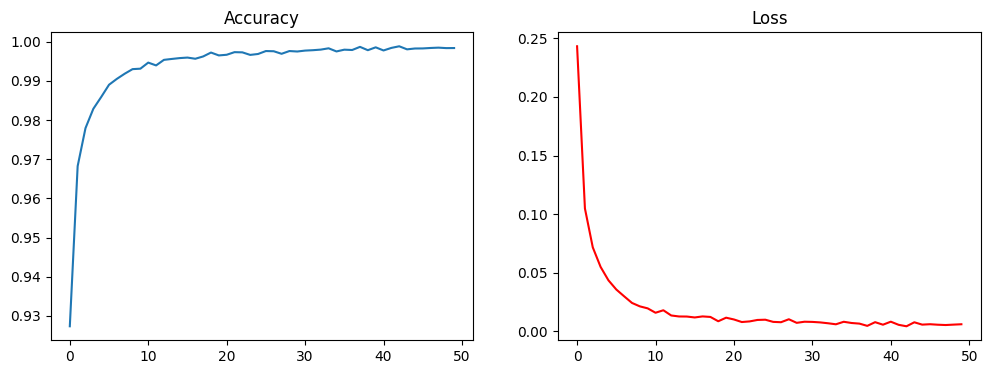

In [29]:
# Plot the training process based on model accuracy and loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history.history["accuracy"])
axs[0].set_title("Accuracy")
axs[1].plot(history.history["loss"], color = "red")
axs[1].set_title("Loss")
plt.show()


In [30]:
# Evaluate model accuracy of the training set
train_acc = history.history["accuracy"][-1]
print(f"Accuracy on the training set: {train_acc}")
train_loss = history.history["loss"][-1]
print(f"Loss on the training set: {train_loss}")

Accuracy on the training set: 0.9983500242233276
Loss on the training set: 0.006136519834399223


In [ ]:
# Evaluate model on the test set
result = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9761 - loss: 0.2091


Mặc dù độ chính xác trên training set lên đến 99.84% và mất mát dưới 1% chứng tỏ mô hình học rất tốt, ta có thể thấy ở biểu đồ trên, có những epoch mà sau đó độ chính xác và mất mát giảm rồi lại tăng, rồi lại giảm. Tức là mô hình không tiếp tục cải thiện sau một số epoch nhất định và có thể dẫn đến overfitting.    
 Để tránh tình trạng này, chúng ta sử dụng phương pháp **EarlyStopping** (dừng sớm). Sau một số epoch nhất định, nếu mô hình không cải thiện thì **EarlyStopping** sẽ dừng quá trình huấn luyện lại và lấy kết quả tốt nhất.   

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = "val_loss",           # Monitor loss on validation set, I will take the test set instead
    patience = 5,                   # Stop training after 5 epochs without improvement
    restore_best_weights = True,    # Restore the best weights
)

model_1 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation = "relu", name = "L1"),
    Dense(64, activation = "relu", name = "L2"),
    Dense(10, activation = "linear", name = "L3")
])

model_1.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True), 
    optimizer = Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs = 50,
    validation_data = (test_images, test_labels),
    callbacks = [early_stopping]
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7973 - loss: 4.1357 - val_accuracy: 0.9213 - val_loss: 0.3086
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9280 - loss: 0.2674 - val_accuracy: 0.9420 - val_loss: 0.1955
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9477 - loss: 0.1755 - val_accuracy: 0.9556 - val_loss: 0.1597
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9557 - loss: 0.1504 - val_accuracy: 0.9538 - val_loss: 0.1694
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9621 - loss: 0.1268 - val_accuracy: 0.9619 - val_loss: 0.1587
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9679 - loss: 0.1152 - val_accuracy: 0.9560 - val_loss: 0.1687
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9715 - loss: 0.0976 - val_accuracy: 0.9537 - val_loss: 0.1750
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9736 - loss: 0.0910 - 

Quá trình huấn luyện đã dừng lại sau 14 epochs thay vì cả 50 epochs như trước. Mình sẽ thử plot accuracy và loss của training set trên biểu đồ.

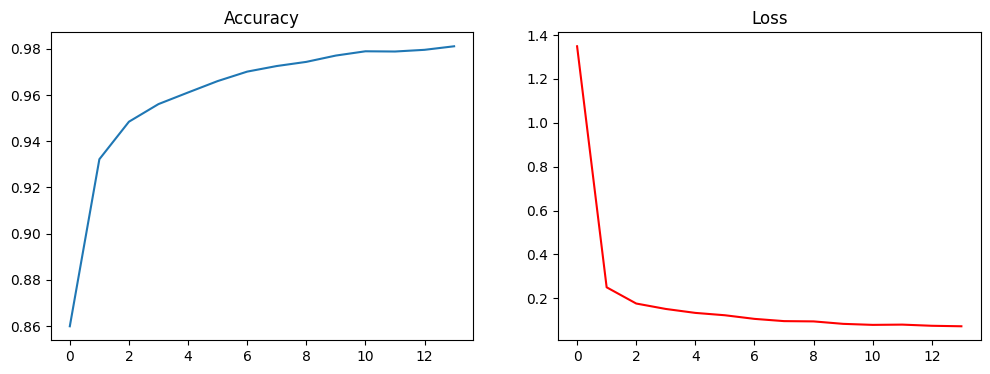

In [10]:
# Plot the training process based on model accuracy and loss
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
axs[0].plot(history_1.history["accuracy"])
axs[0].set_title("Accuracy")
axs[1].plot(history_1.history["loss"], color = "red")
axs[1].set_title("Loss")
plt.show()


In [11]:
# Evaluate model accuracy of the training set
train_acc = history_1.history["accuracy"][-1]
print(f"Accuracy on the training set: {train_acc}")
train_loss = history_1.history["loss"][-1]
print(f"Loss on the training set: {train_loss}")

Accuracy on the training set: 0.9811000227928162
Loss on the training set: 0.07251974195241928


In [12]:
# Evaluate model on the test set
result = model_1.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9606 - loss: 0.1829  


Sau epoch 3, giá trị **val_loss** không còn giảm liên tục nữa nên ta có thể chọn mô hình tốt nhất ở epoch 3.

## Make predictions for a random set
Dự đoán chữ số trong 64 ảnh ngẫu nhiên và so sánh với label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

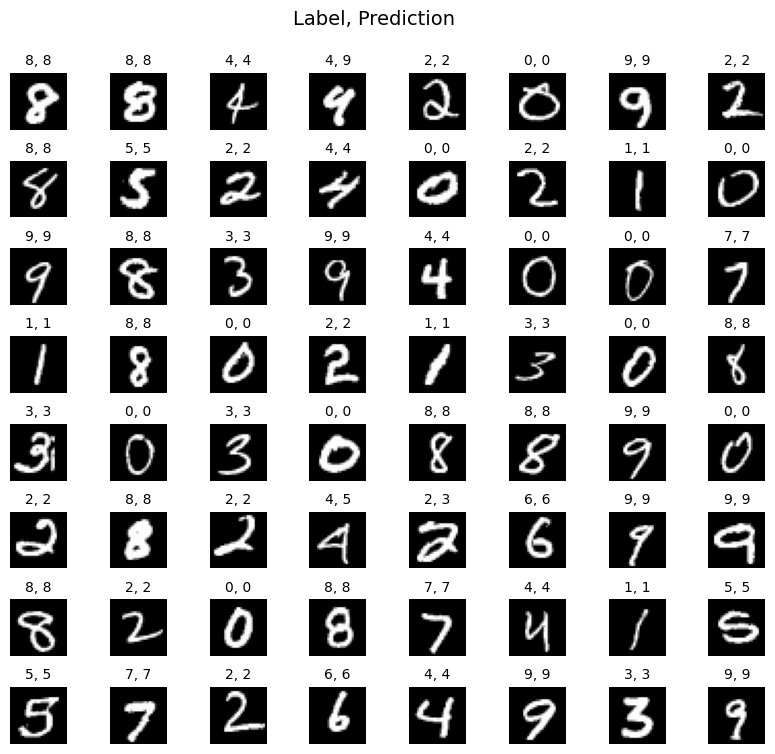

In [ ]:
test_images = test_images * 255
m, n = test_images[0].shape
# print(model_1.input_shape) # to see model's expected input shape

fig, axes = plt.subplots(8, 8, figsize = (8, 8))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(len(test_images))
    img_random_reshaped = test_images[random_index].reshape((28, 28))
    
    ax.imshow(img_random_reshaped, cmap="gray")
    
    prediction = model_1.predict(test_images[random_index].reshape(1, 28, 28))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    ax.set_title(f"{test_labels[random_index]}, {yhat}", fontsize=10)
    ax.set_axis_off()
    
fig.suptitle("Label, Prediction", fontsize=14)
plt.show()